In [637]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [638]:
class ID3DecisionTree:
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given dataset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []

    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)

    total_weighted_entropy = np.sum(weighted_entropy_list)

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [649]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("/Downloads")
df = pd.read_csv('iris_csv.csv')

In [650]:
iris_setosa=df.loc[df["class"]=="Iris-setosa"]
iris_virginica=df.loc[df["class"]=="Iris-virginica"]
iris_versicolor=df.loc[df["class"]=="Iris-versicolor"]

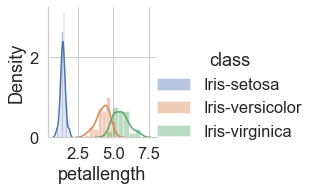

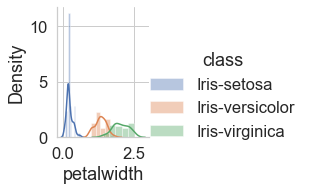

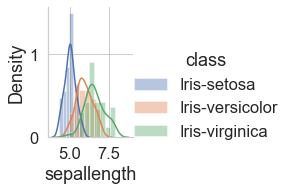

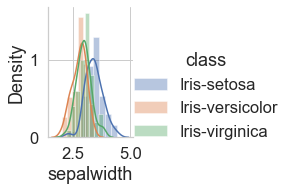

In [655]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(df,hue="class",size=3).map(sns.distplot,"petallength").add_legend()
sns.FacetGrid(df,hue="class",size=3).map(sns.distplot,"petalwidth").add_legend()
sns.FacetGrid(df,hue="class",size=3).map(sns.distplot,"sepallength").add_legend()
sns.FacetGrid(df,hue="class",size=3).map(sns.distplot,"sepalwidth").add_legend()
plt.show()

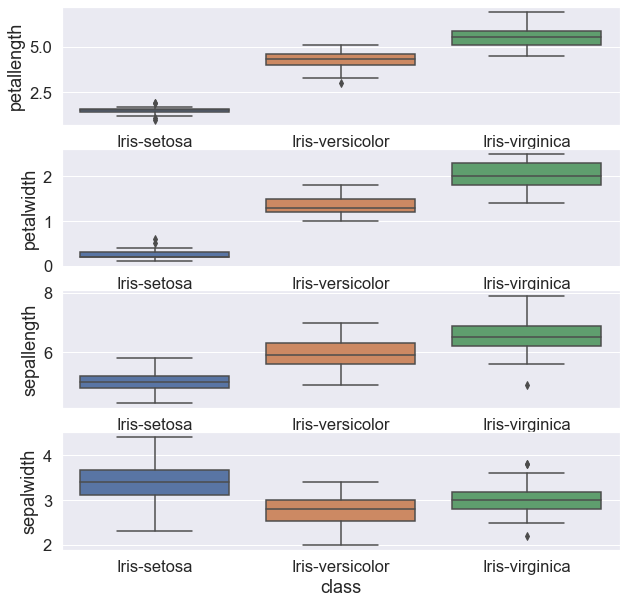

In [652]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10, 10))
sns.boxplot(x="class",y="petallength",data=df, ax=ax1)
sns.boxplot(x="class",y="petalwidth",data=df, ax=ax2)
sns.boxplot(x="class",y="sepallength",data=df, ax=ax3)
sns.boxplot(x="class",y="sepalwidth",data=df, ax=ax4)
plt.show()

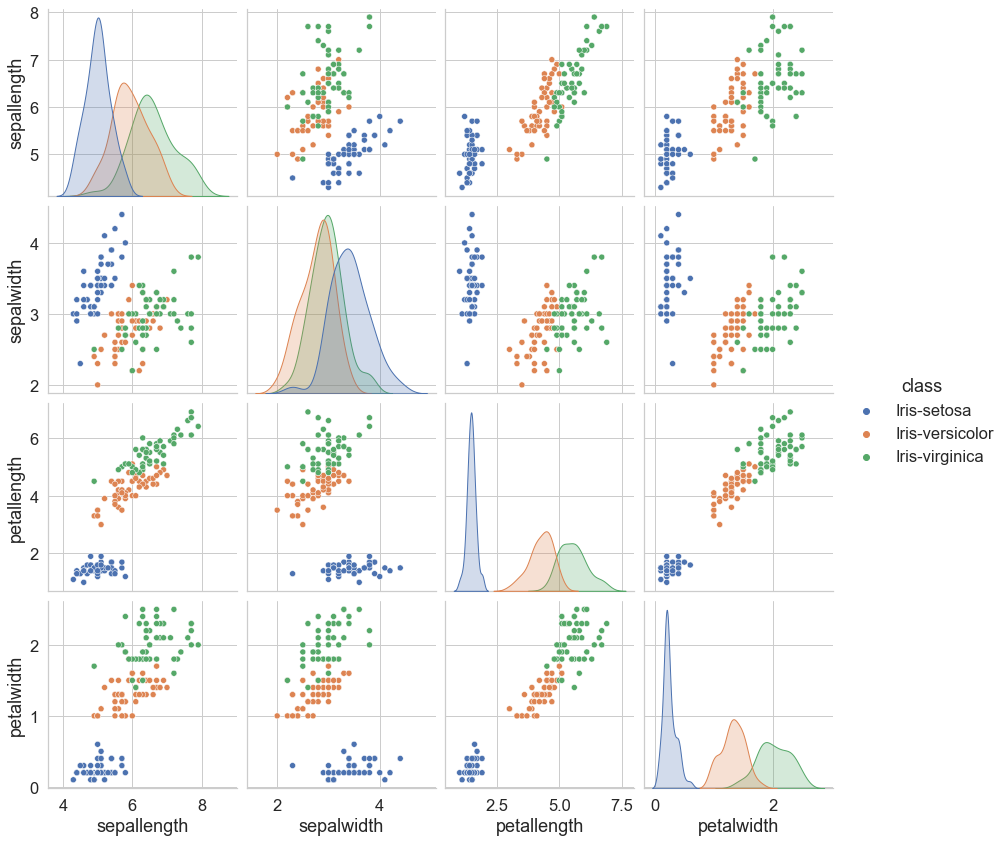

In [653]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="class",size=3);
plt.show()

In [656]:
# rename known columns
columns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']
df.columns = columns

# convert class feature to binary
df['class'] = df['class'].replace(['Iris-setosa'], 0)
df['class'] = df['class'].replace(['Iris-versicolor'], 1)
df['class'] = df['class'].replace(['Iris-virginica'], 2)
df['class'] = df['class'].astype(int)
df['sepallength'] = round(df['sepallength'])
df['sepalwidth'] = round(df['sepalwidth'])
df['petallength'] = round(df['petallength'])
df['petalwidth'] = round(df['petalwidth'])

# drop rows with missing values, missing = ?
df = df.replace("?", np.nan)
df = df.dropna()

In [657]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# organize data into input and output
X = df.drop(columns="class")
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# initialize and fit model
model = ID3DecisionTree()
model.fit(X_train, y_train)
clf = model.fit(X_train, y_train)

# return accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9111111111111111

In [658]:
from sklearn.metrics import confusion_matrix
cmx = confusion_matrix(y_test,y_pred, labels=[0,1,2])

In [659]:
print(cmx)

[[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]


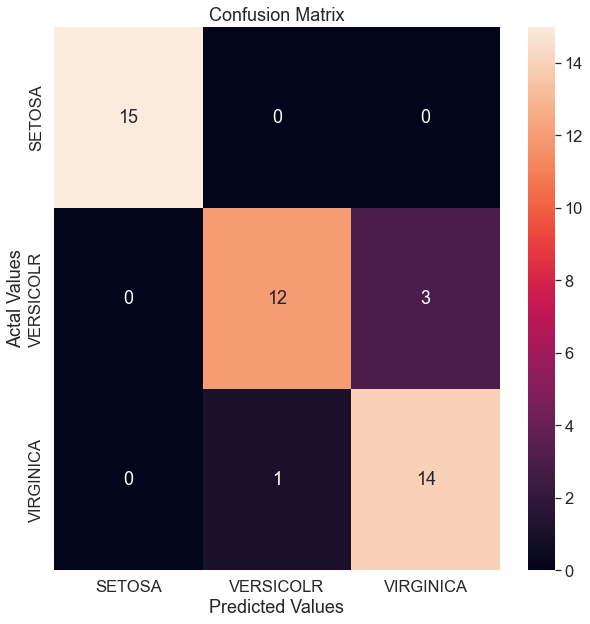

In [660]:
cm = pd.DataFrame(cmx,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [661]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.80      0.86        15
           2       0.82      0.93      0.87        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [695]:
model.tree

{'petallength': {1.0: 0.0,
  2.0: 0.0,
  3.0: 1.0,
  4.0: 1.0,
  5.0: {'petalwidth': {1.0: 1.0,
    2.0: {'sepallength': {6.0: {'sepalwidth': {2.0: 2.0, 3.0: 2.0}},
      7.0: {'sepalwidth': {3.0: 2.0}}}}}},
  6.0: 2.0,
  7.0: 2.0}}